In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

## We start by gathering data

[Source: Original data source](http://lib.stat.cmu.edu/datasets/)

In [94]:
# Gathering the data
california_dataset = fetch_california_housing()
california_dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [95]:
#pd.DataFrame(data=california_dataset, columns=california_dataset.feature_names, axes=1)

In [96]:
dir(california_dataset)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [97]:
print(california_dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [98]:
california_dataset.data.shape

(20640, 8)

In [99]:
california_dataset.target.size

20640

## In this section we are exploring the data with Pandas DataFrame

In [100]:
data = pd.DataFrame(data=california_dataset.data, columns=california_dataset.feature_names) #DataFrame created
data['Price'] = california_dataset.target #Adding target to dataset

In [101]:
data.shape

(20640, 9)

In [102]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [103]:
data.count()

MedInc        20640
HouseAge      20640
AveRooms      20640
AveBedrms     20640
Population    20640
AveOccup      20640
Latitude      20640
Longitude     20640
Price         20640
dtype: int64

## Clean Data- Check if data has missing value in rows

In [104]:
pd.isnull(data).any()

MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
Price         False
dtype: bool

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


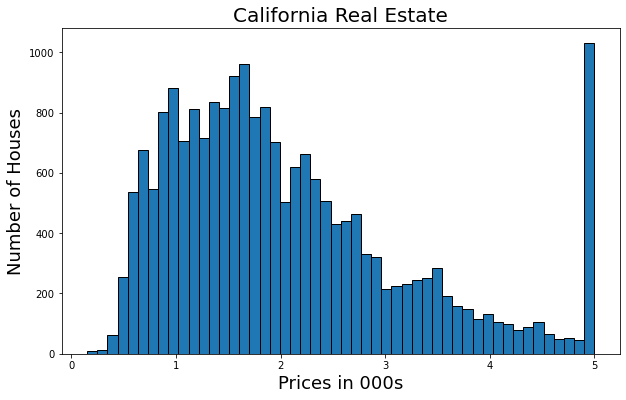

In [106]:
plt.figure(figsize=(10, 6))
plt.hist(data['Price'], bins=50, ec='black')
plt.title('California Real Estate', size=20)
plt.xlabel('Prices in 000s', size = 18)
plt.ylabel('Number of Houses', size=18)
plt.show()

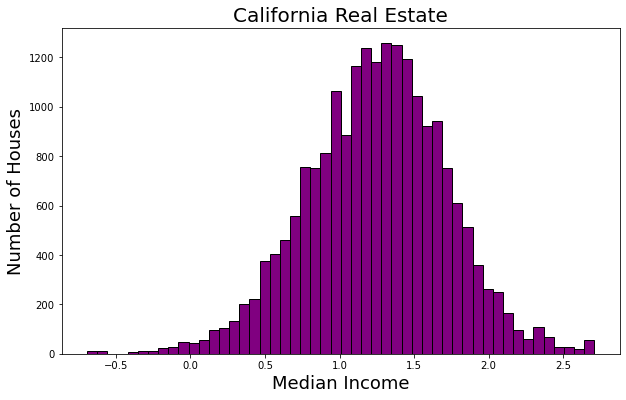

In [107]:
plt.figure(figsize=(10, 6))
plt.hist(np.log(data['MedInc']), bins=50, ec='black', color='purple')
plt.title('California Real Estate', size=20)
plt.xlabel('Median Income', size = 18)
plt.ylabel('Number of Houses', size=18)
plt.show()

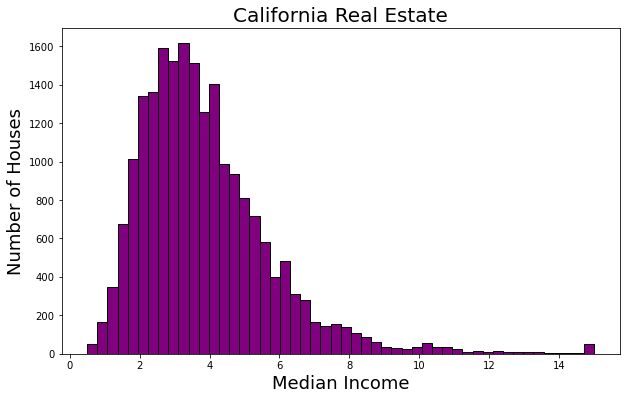

In [108]:
plt.figure(figsize=(10, 6))
plt.hist(data['MedInc'], bins=50, ec='black', color='purple')
plt.title('California Real Estate', size=20)
plt.xlabel('Median Income', size = 18)
plt.ylabel('Number of Houses', size=18)
plt.show()

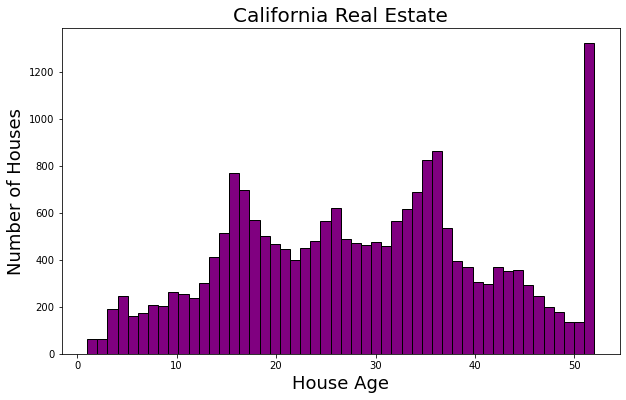

In [109]:
plt.figure(figsize=(10, 6))
plt.hist(data['HouseAge'], bins=50, ec='black', color='purple')
plt.title('California Real Estate', size=20)
plt.xlabel('House Age', size = 18)
plt.ylabel('Number of Houses', size=18)
plt.show()

In [110]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [111]:
data.min()

MedInc          0.499900
HouseAge        1.000000
AveRooms        0.846154
AveBedrms       0.333333
Population      3.000000
AveOccup        0.692308
Latitude       32.540000
Longitude    -124.350000
Price           0.149990
dtype: float64

In [112]:
data.max()

MedInc           15.000100
HouseAge         52.000000
AveRooms        141.909091
AveBedrms        34.066667
Population    35682.000000
AveOccup       1243.333333
Latitude         41.950000
Longitude      -114.310000
Price             5.000010
dtype: float64

In [113]:
data['Latitude'].corr(data['Longitude'])

-0.9246644339150413

In [114]:
data['AveRooms'].corr(data['Price'])

0.15194828974145777

In [115]:
data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [116]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices]=True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

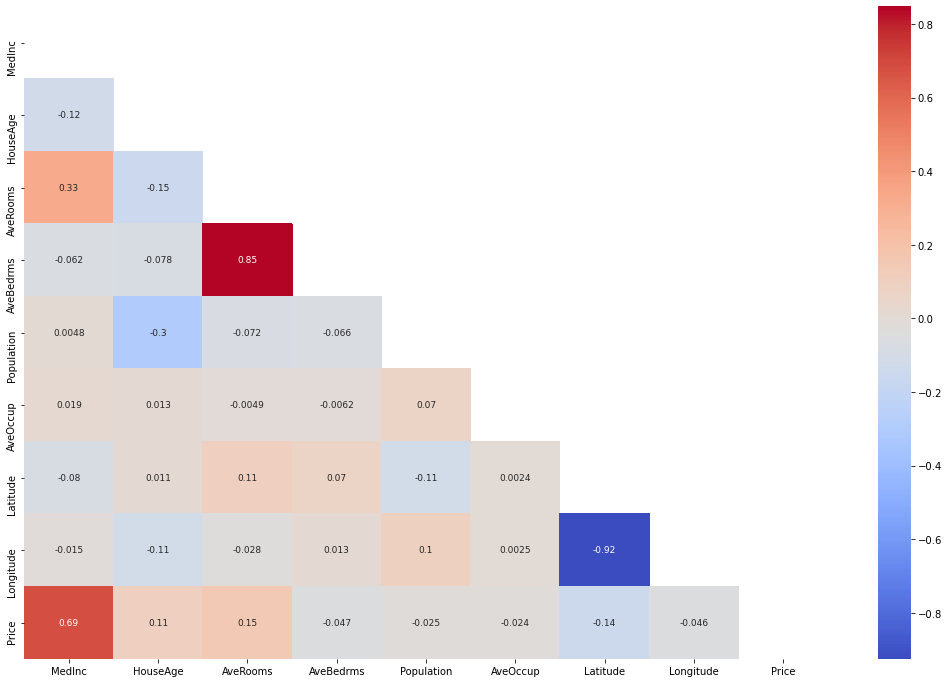

In [117]:
plt.figure(figsize=(18,12))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={'size':9}, cmap='coolwarm') #sns heatmap is also awesome.
plt.show()

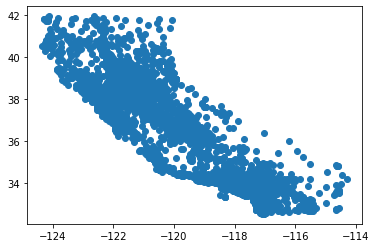

In [118]:
plt.scatter(x=data['Longitude'], y=data['Latitude'])
plt.show()

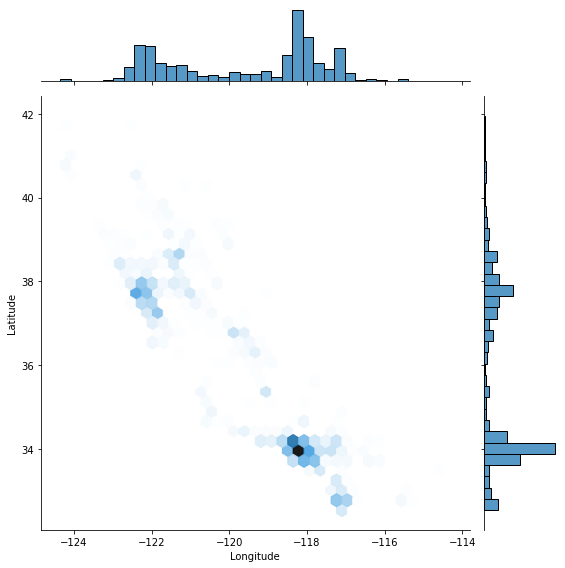

In [119]:
sns.jointplot(x=data['Longitude'], y=data['Latitude'], kind='hex', height=8, joint_kws={'alpha':0.9}) #Joint plot is a powerfull tool.
plt.show()

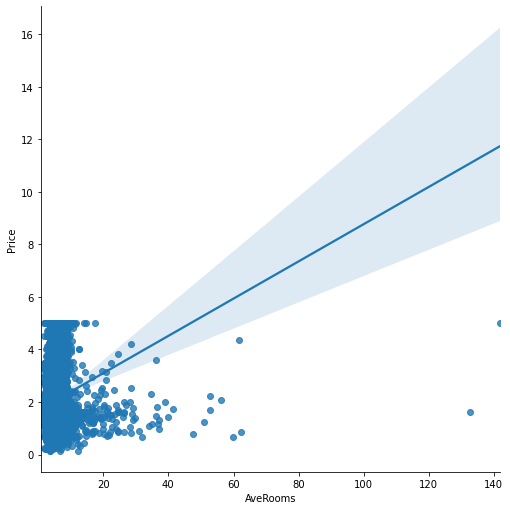

In [120]:
sns.lmplot(x='AveRooms', y='Price', data=data, height=7)
plt.show()

In [121]:
#%%time

#sns.pairplot(data) #needs a lot of cpu power. Awesome tool for plotting multiple features to trace their correlation.
#plt.show()

In [122]:
#%%time

#sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color': 'cyan'}}) #You can run multiple regressions with it.
#plt.show()

In [123]:
#log_MedInc = np.log(data['MedInc'])
#data['MedInc'].skew()
#log_MedInc.skew()

In [124]:
prices = data['Price']
features = data.drop('Price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

In [125]:
len(X_train)/len(features)

0.8

In [126]:
X_test.shape[0]/features.shape[0]

0.2

In [127]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=(['coef']))

Intercept -37.486965765373114


,coef
MedInc,0.433102
HouseAge,0.009324
AveRooms,-0.100333
AveBedrms,0.615219
Population,-0.000003
AveOccup,-0.004782
Latitude,-0.429077
Longitude,-0.441484


In [128]:
regr.score(X_train,y_train) # r-squared for training data

0.6074049305021048

In [129]:
regr.score(X_test, y_test) # r-squared for test data

0.6009790143129105

In [130]:
data['Price'].skew()

0.9777632739098345

In [144]:
#y_log = np.log(data['Price'])
#y_log.skew()

In [145]:
#y_log.max()

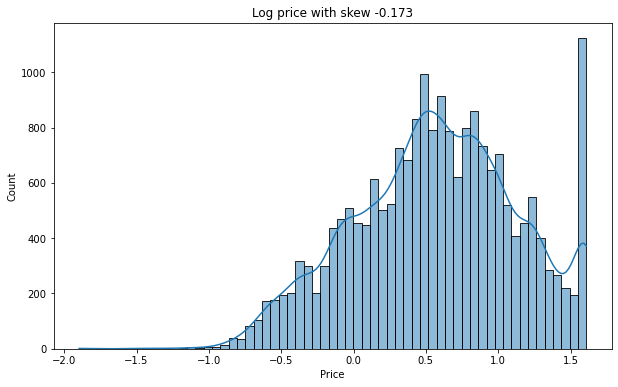

In [147]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log(data['Price']), kde=True)
plt.title(f'Log price with skew {round(y_log.skew(), 3)}')
plt.show()

In [148]:
prices = np.log(data['Price']) #Using Log prices
log_MedInc = np.log(data['MedInc'])
data['log_MedInc'] = log_MedInc
features = data.drop(['Price', 'MedInc', 'Population'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Transformed training data r-squared:', regr.score(X_train,y_train))
print('Transformed tes data r-squared:', regr.score(X_test,y_test))
print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=(['coef']))

Transformed training data r-squared: 0.6274572856315966
Transformed tes data r-squared: 0.623090733246483
Intercept -23.82534123482267


,coef
HouseAge,0.002849
AveRooms,-0.033728
AveBedrms,0.240009
AveOccup,-0.002108
Latitude,-0.278092
Longitude,-0.277583
log_MedInc,0.771507


In [149]:
X_incl_constants = sm.add_constant(X_train) #Adding intercept value for sm to be able to run.
model = sm.OLS(y_train, X_incl_constants)

results = model.fit()
#results.params
#results.pvalues
pd.DataFrame({'Coef':results.params, 'p-values':round(results.pvalues, 4)})

,Coef,p-values
const,-23.825341,0.0
HouseAge,0.002849,0.0
AveRooms,-0.033728,0.0
AveBedrms,0.240009,0.0
AveOccup,-0.002108,0.0
Latitude,-0.278092,0.0
Longitude,-0.277583,0.0
log_MedInc,0.771507,0.0


In [150]:
variance_inflation_factor(exog=X_incl_constants.values, exog_idx=1)

1.1267477052654662

In [151]:
vif = [variance_inflation_factor(exog=X_incl_constants.values, exog_idx=i) for i in range(X_incl_constants.shape[1])]

pd.DataFrame({'coef_name':X_incl_constants.columns, 'vif':np.around(vif, 2)})

,coef_name,vif
0,const,17309.48
1,HouseAge,1.13
2,AveRooms,8.66
3,AveBedrms,7.42
4,AveOccup,1.00
5,Latitude,9.47
6,Longitude,9.16
7,log_MedInc,2.46


In [156]:
X_incl_constants = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_constants)

results = model.fit()

org_coef = pd.DataFrame({'Coef':results.params, 'p-values':round(results.pvalues, 3)}) # storing the original coef values

print('Model BIC is:', results.bic)
print('Model r-squared is:', results.rsquared)

Model BIC is: 11993.226265303163
Model r-squared is: 0.6274572856315963


In [157]:
org_coef

,Coef,p-values
const,-23.825341,0.0
HouseAge,0.002849,0.0
AveRooms,-0.033728,0.0
AveBedrms,0.240009,0.0
AveOccup,-0.002108,0.0
Latitude,-0.278092,0.0
Longitude,-0.277583,0.0
log_MedInc,0.771507,0.0


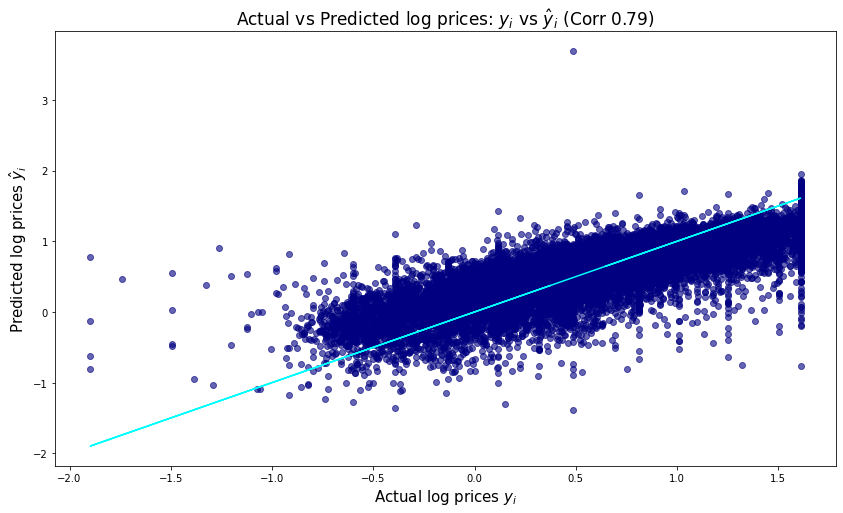

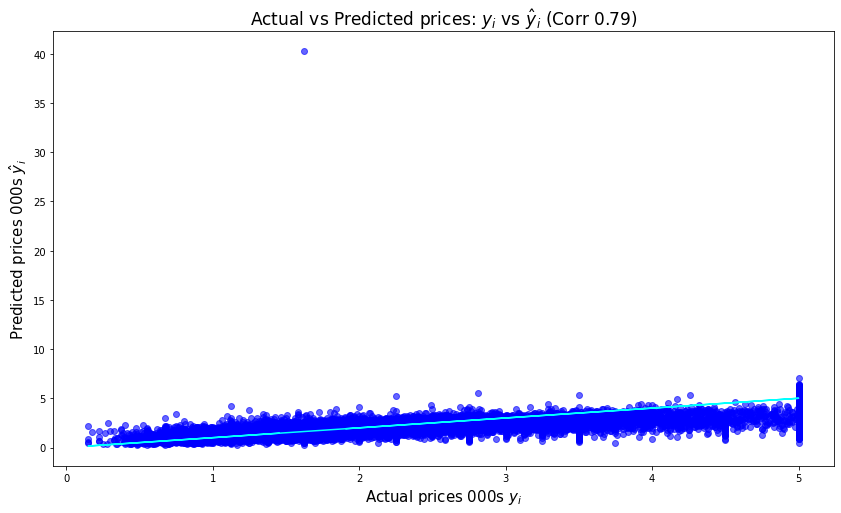

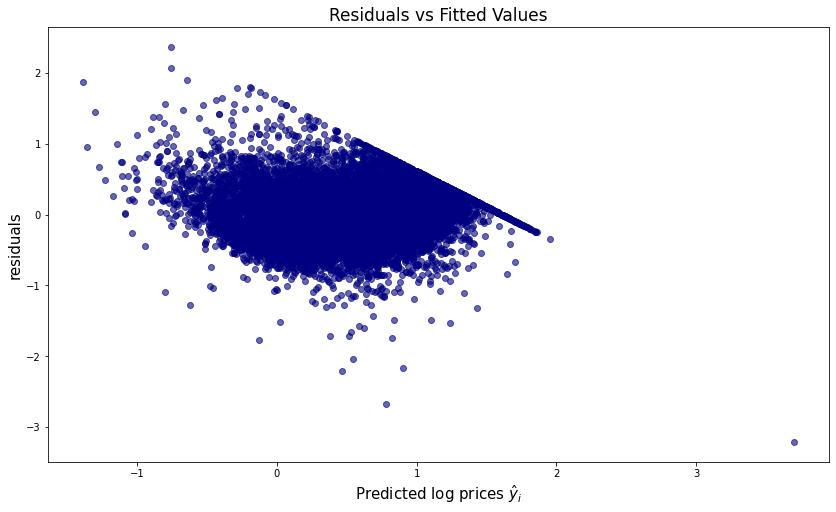

0.121
0.627


In [158]:
#Modified model: transformed (using log prices & Log MedInc)

prices = np.log(data['Price']) #Using Log prices
log_MedInc = np.log(data['MedInc']) #Using log MedInc
data['log_MedInc'] = log_MedInc
features = data.drop(['Price', 'MedInc', 'Population'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# Using Statsmodel
X_incl_constants = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_constants)
results = model.fit()

# Residuals
#residuals = y_train - results.fittedvalues
# results.resid

# Graph of actual vs predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.figure(figsize=(14,8))
plt.scatter(y_train, results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=15)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=15)
plt.title(f'Actual vs Predicted log prices: $y _i$ vs $\hat y _i$ (Corr {corr})', fontsize=17)
plt.show()

plt.figure(figsize=(14,8))
plt.scatter(x= np.e**y_train, y= np.e**results.fittedvalues, c='blue', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='cyan')

plt.xlabel('Actual prices 000s $y _i$', fontsize=15)
plt.ylabel('Predicted prices 000s $\hat y _i$', fontsize=15)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y _i$ (Corr {corr})', fontsize=17)
plt.show()

# Resuduals vs Predicted values

plt.figure(figsize=(14,8))
plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)

plt.xlabel('Predicted log prices $\hat y _i$', fontsize=15)
plt.ylabel('residuals', fontsize=15)
plt.title(f'Residuals vs Fitted Values', fontsize=17)
plt.show()

# MSE- Mean squared error & r_squared

reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)

print(reduced_log_mse)
print(reduced_log_rsquared)

In [159]:
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

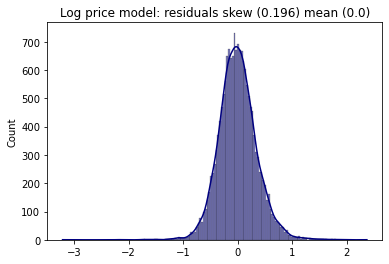

In [160]:
sns.histplot(results.resid, color='navy', kde=True)
#plt.figure(figsize=(14,8)
plt.title(f'Log price model: residuals skew ({resid_skew}) mean ({resid_mean})')
plt.show()